<a href="https://colab.research.google.com/github/prasannareddy2804/DataSets_Analysis/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Australia Weather Data Prediction

##Table of Contents:
**1.Data set Information**

**2.Import**

**3.Exploratory Data Analysis (EDA) & Visualization**

**4.Data Cleaning and Feature Engineering**

**5.Model Building**

**6.Model Evaluation**

## 1.Data set information

> Add blockquote




This dataset contains 10 years of daily weather observations from many locations across Australia.

There are 23 features in this dataset, including the target variable "RainTomorrow".

Tomorrow's rain is the target variable for forecasting. This means - did it rain the next day, yes or no?

This column indicates "Yes" if the amount of precipitation on that day was 1 mm or more.

In this project, I will use the available data to predict whether it will rain the next day or not.

## 2.Import


In [ ]:
# All the libraries used in this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 3.Exploratory Data Analysis (EDA) & Visualization

In [ ]:
# Reading Data set using pandas
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
# five random strings
df.sample(5)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
20599   2016-01-23     NorahHead     22.0     27.8      25.2          NaN   
31392   2011-07-01        Sydney     10.8     16.6       0.4          2.6   
100221  2010-11-09  MountGambier      4.9     25.0       0.8          0.8   
73622   2013-10-07          Nhil      3.5     20.0       0.2          NaN   
131539  2013-05-26        Hobart     12.7     15.4       0.0          4.0   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
20599        NaN         SSW           57.0          S  ...        91.0   
31392        1.9         SSE           33.0        WNW  ...        91.0   
100221      12.4         NNW           37.0        NNE  ...        70.0   
73622        NaN         WSW           41.0        ESE  ...        87.0   
131539       7.2           W           72.0          N  ...        59.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
20599          86.0       1006.6       1008.1       NaN       NaN     26.2   
31392          67.0       1031.6       1028.1       NaN       NaN     12.3   
100221         42.0       1023.0       1018.5       3.0       6.0     15.3   
73622          54.0       1015.6       1014.5       NaN       NaN      9.7   
131539         48.0       1016.3       1018.0       NaN       NaN     13.4   

        Temp3pm  RainToday  RainTomorrow  
20599      23.1        Yes            No  
31392      16.2         No           Yes  
100221     24.1         No            No  
73622      17.7         No            No  
131539     14.6         No            No  

[5 rows x 23 columns]

In [ ]:
df.shape

(145460, 23)

In [ ]:
# The .info() method for each column outputs the number of non-empty (not-null) values and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# method .isnull() outputs a logical array where the omissions are indicated as True
# the .sum() method by default sums these True or units by columns (axis = 0)
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

## 3.Exploratory Data Analysis

In [ ]:
fig=px.histogram(df,
                 x="RainTomorrow",
                 color="Location",
                 hover_data=df.columns,
                 title="Distribution of RainTomorrow Distribution by Location",
                 barmode="group",
                )
fig.show()

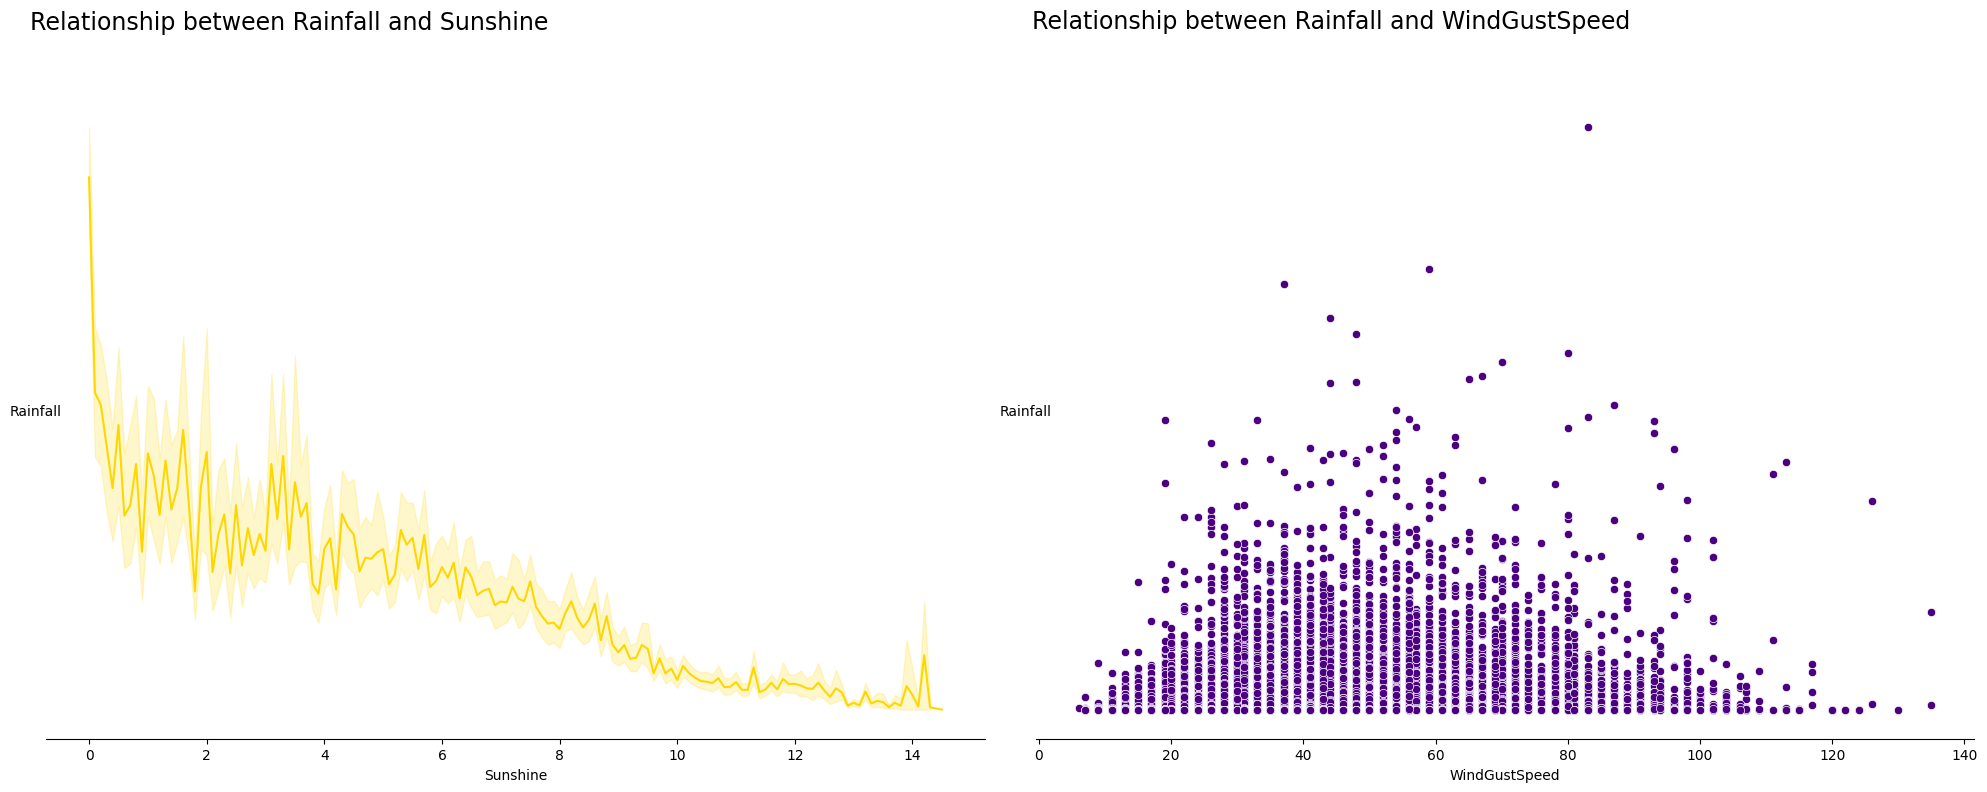

In [ ]:
# relationship between two continuous variables

fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Rainfall and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and WindGustSpeed",fontsize=17,fontweight='normal', fontfamily='Verdana')

sns.lineplot(data=df,x='Sunshine',y='Rainfall',ax=ax[0],color='#FFD700')
sns.scatterplot(data=df,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='#4B0082')

for i in range(2):

    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)

    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

plt.tight_layout()
plt.show()

<Axes: xlabel='Cloud3pm', ylabel='Rainfall'>

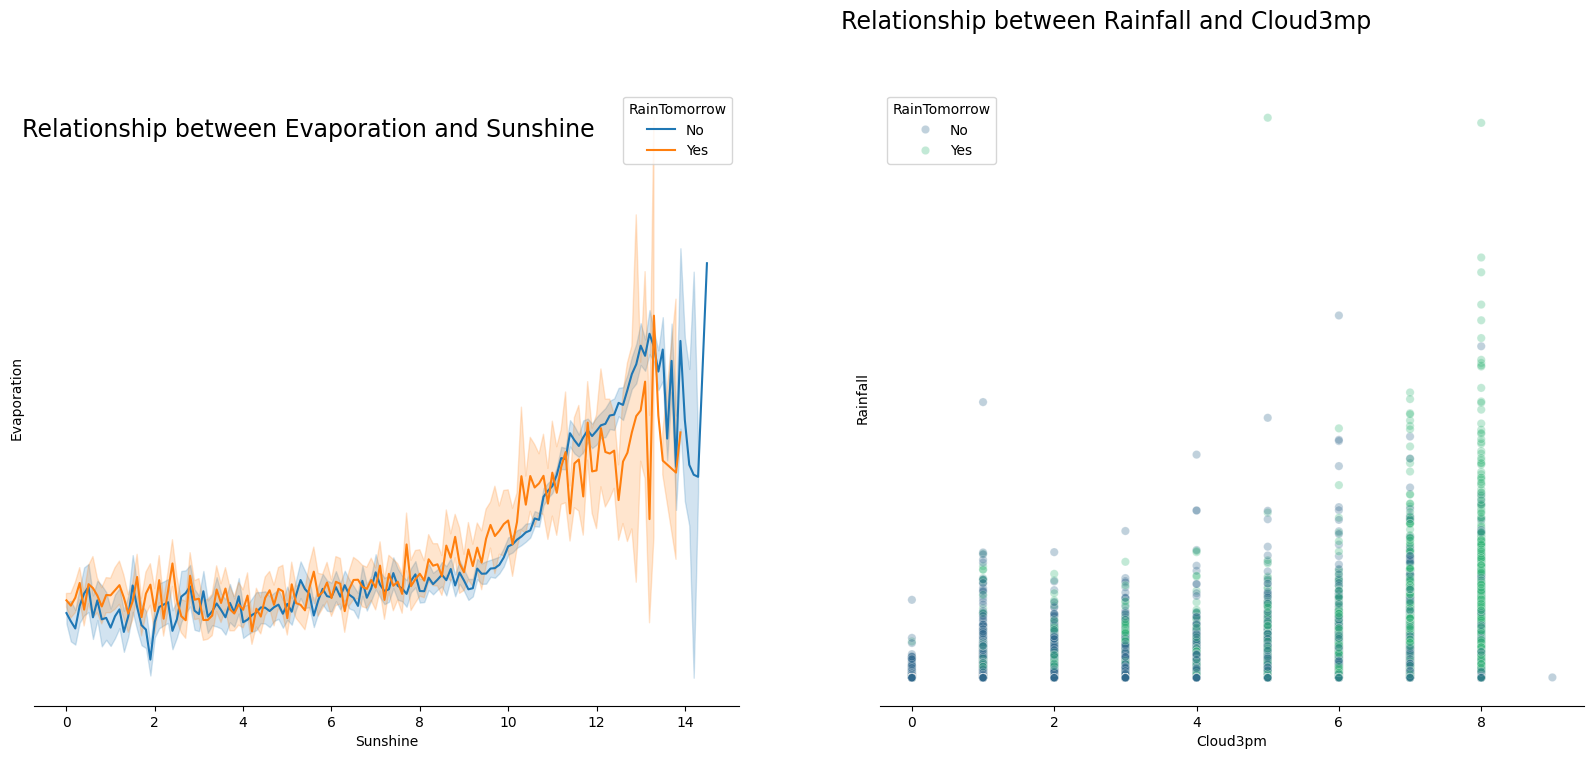

In [ ]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for i in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Evaporation and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and Cloud3mp",fontsize=17,fontweight='normal', fontfamily='Verdana')


for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)

    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)

sns.lineplot(data=df,x='Sunshine',y='Evaporation',ax=ax[0],hue='RainTomorrow')
sns.scatterplot(data=df,x='Cloud3pm',y='Rainfall',hue='RainTomorrow',ax=ax[1],palette='viridis',markers='o',alpha=0.3)

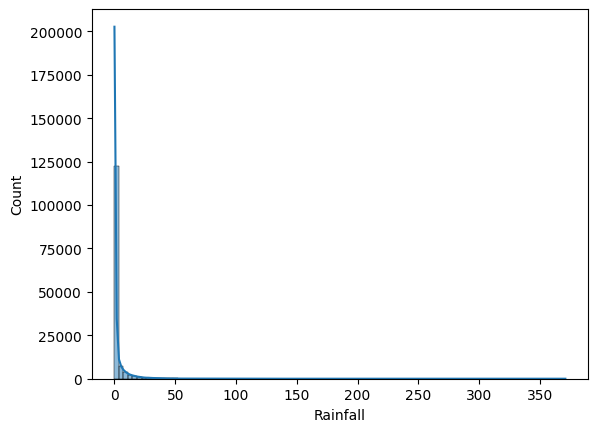

In [ ]:
# feature is distributed across 100 bins
sns.histplot(data = df, x = 'Rainfall', bins = 100, kde = True);

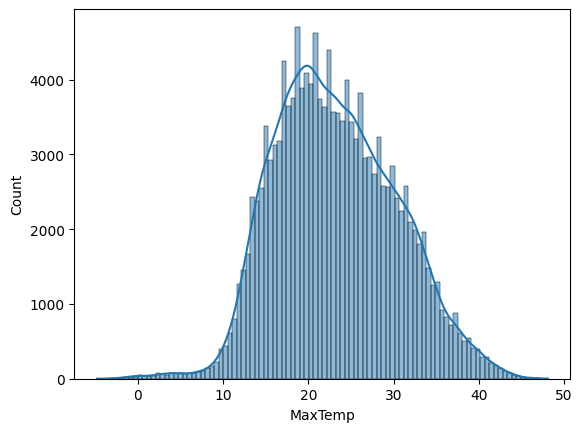

In [ ]:
# for how the MaxTemp feature is distributed across 100 bins
sns.histplot(data = df, x = 'MaxTemp', bins = 100, kde = True);

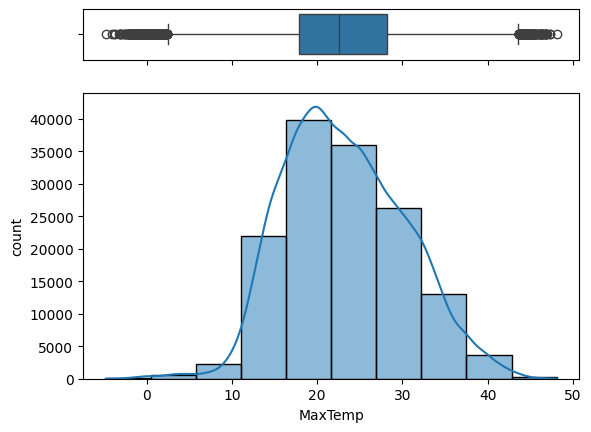

In [ ]:
# creating a histogram, a boxplot and a density graph for Max Temp
fig, (ax_box, ax_hist) = plt.subplots(2,
                                    sharex = True,
                                    gridspec_kw = {'height_ratios': (.15, .85)})

sns.boxplot(x = df['MaxTemp'], ax = ax_box)
sns.histplot(x = df['MaxTemp'], ax = ax_hist, bins = 10, kde = True)

ax_box.set(xlabel = '')
ax_hist.set(xlabel = 'MaxTemp')
ax_hist.set(ylabel = 'count')

plt.show()

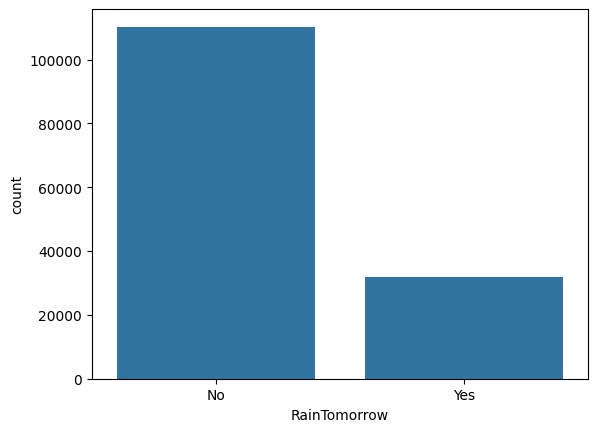

In [ ]:
# the count plot() function itself will count the number of observations in each of the categories
sns.countplot(x = 'RainTomorrow', data = df);

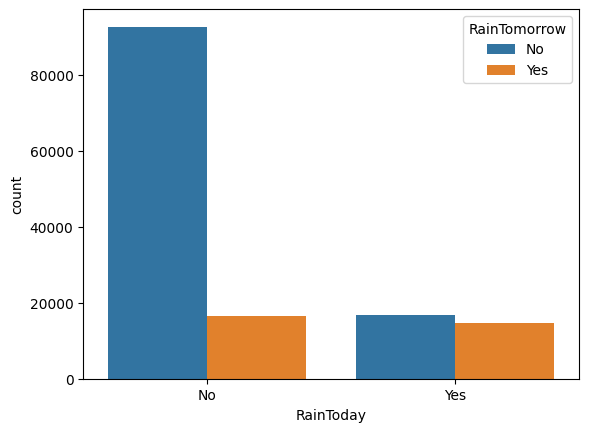

In [ ]:
#dependence of whether it will rain tomorrow on whether it rained today
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = df);

## 4.Data Cleaning and Feature Engineering

In [ ]:
# Get list of categorical variables
s = (df.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Missing values in categorical variables

for i in object_cols:
    print(i, df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [ ]:
# Filling missing values with mode of the column in value

for i in object_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
# convert  "Rain Today" and "RainTomorrow" into binary (1/0) for convenience
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8          0   
1       1010.6       1007.8       NaN       NaN     17.2     24.3          0   
2       1007.6       1008.7       NaN       2.0     21.0     23.2          0   
3       1017.6       1012.8       NaN       NaN     18.1     26.5          0   
4       1010.8       1006.0       7.0       8.0     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

In [ ]:
# Get list of neumeric variables
t = (df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
# Missing values in numeric variables

for i in num_cols:
    print(i, df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [ ]:
# Filling missing values with median of the column in value

for i in num_cols:
    df[i].fillna(df[i].median(), inplace=True)

In [ ]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          4.8       8.4   
1  2008-12-02   Albury      7.4     25.1       0.0          4.8       8.4   
2  2008-12-03   Albury     12.9     25.7       0.0          4.8       8.4   
3  2008-12-04   Albury      9.2     28.0       0.0          4.8       8.4   
4  2008-12-05   Albury     17.5     32.3       1.0          4.8       8.4   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       5.0     16.9     21.8          0   
1       1010.6       1007.8       5.0       5.0     17.2     24.3          0   
2       1007.6       1008.7       5.0       2.0     21.0     23.2          0   
3       1017.6       1012.8       5.0       5.0     18.1     26.5          0   
4       1010.8       1006.0       7.0       8.0     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [ ]:
# checking if there are missing in our data
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
# categorical variables
cat_cols=df.select_dtypes(include='object').columns.to_list()
print(cat_cols)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [ ]:
# pass to the columns parameter the column that we want to delete
# delete the Date column, as we will not use it further in this project
df.drop(columns = ['Date'], inplace = True)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# categorical variables: the amount of categorical data has decreased
cat_cols=df.select_dtypes(include='object').columns.to_list()
print(cat_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [ ]:
# perform direct coding of categorical variables
print("Initial features:\n", list(df.columns), "\n")
df_dummies = pd.get_dummies(df, dtype=float)
print("Features after get_dummies:\n", list(df_dummies.columns))

Initial features:
 ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'] 

Features after get_dummies:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 

In [ ]:
df_dummies.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.8       8.4           44.0   
1      7.4     25.1       0.0          4.8       8.4           44.0   
2     12.9     25.7       0.0          4.8       8.4           46.0   
3      9.2     28.0       0.0          4.8       8.4           24.0   
4     17.5     32.3       1.0          4.8       8.4           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
0          20.0          24.0         71.0         22.0  ...             0.0   
1           4.0          22.0         44.0         25.0  ...             0.0   
2          19.0          26.0         38.0         30.0  ...             0.0   
3          11.0           9.0         45.0         16.0  ...             0.0   
4           7.0          20.0         82.0         33.0  ...             0.0   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0            0.0           0.0            0.0             0.0             0.0   
1            0.0           0.0            0.0             0.0             0.0   
2            0.0           0.0            0.0             0.0             0.0   
3            0.0           0.0            0.0             0.0             0.0   
4            1.0           0.0            0.0             0.0             0.0   

   WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
0            0.0           0.0             1.0             0.0  
1            0.0           0.0             0.0             1.0  
2            0.0           0.0             0.0             1.0  
3            0.0           0.0             0.0             0.0  
4            0.0           0.0             0.0             0.0  

[5 rows x 115 columns]

In [ ]:
df_dummies.shape

(145460, 115)

In [ ]:
df_dummies.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       12.192053      23.215962       2.307990       5.179779   
std         6.365780       7.088358       8.389771       3.178819   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.700000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.200000   
max        33.900000      48.100000     371.000000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        7.989889      39.962189      14.030751      18.669758   
std         2.757790      13.120931       8.861796       8.716716   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.400000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm  ...  WindDir3pm_NNW  WindDir3pm_NW  \
count  145460.000000  145460.000000  ...   145460.000000  145460.000000   
mean       68.901251      51.553396  ...        0.054104       0.059192   
std        18.855360      20.471345  ...        0.226224       0.235984   
min         0.000000       0.000000  ...        0.000000       0.000000   
25%        57.000000      37.000000  ...        0.000000       0.000000   
50%        70.000000      52.000000  ...        0.000000       0.000000   
75%        83.000000      65.000000  ...        0.000000       0.000000   
max       100.000000     100.000000  ...        1.000000       1.000000   

        WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
count  145460.000000  145460.000000   145460.000000   145460.000000   
mean        0.068239       0.103575        0.064616        0.056070   
std         0.252156       0.304709        0.245847        0.230058   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.000000       0.000000        0.000000        0.000000   
50%         0.000000       0.000000        0.000000        0.000000   
75%         0.000000       0.000000        0.000000        0.000000   
max         1.000000       1.000000        1.000000        1.000000   

       WindDir3pm_SW   WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
count  145460.000000  145460.000000   145460.000000   145460.000000  
mean        0.064306       0.069504        0.061006        0.065434  
std         0.245299       0.254310        0.239343        0.247291  
min         0.000000       0.000000        0.000000        0.000000  
25%         0.000000       0.000000        0.000000        0.000000  
50%         0.000000       0.000000        0.000000        0.000000  
75%         0.000000       0.000000        0.000000        0.000000  
max         1.000000       1.000000        1.000000        1.000000  

[8 rows x 115 columns]

<Axes: >

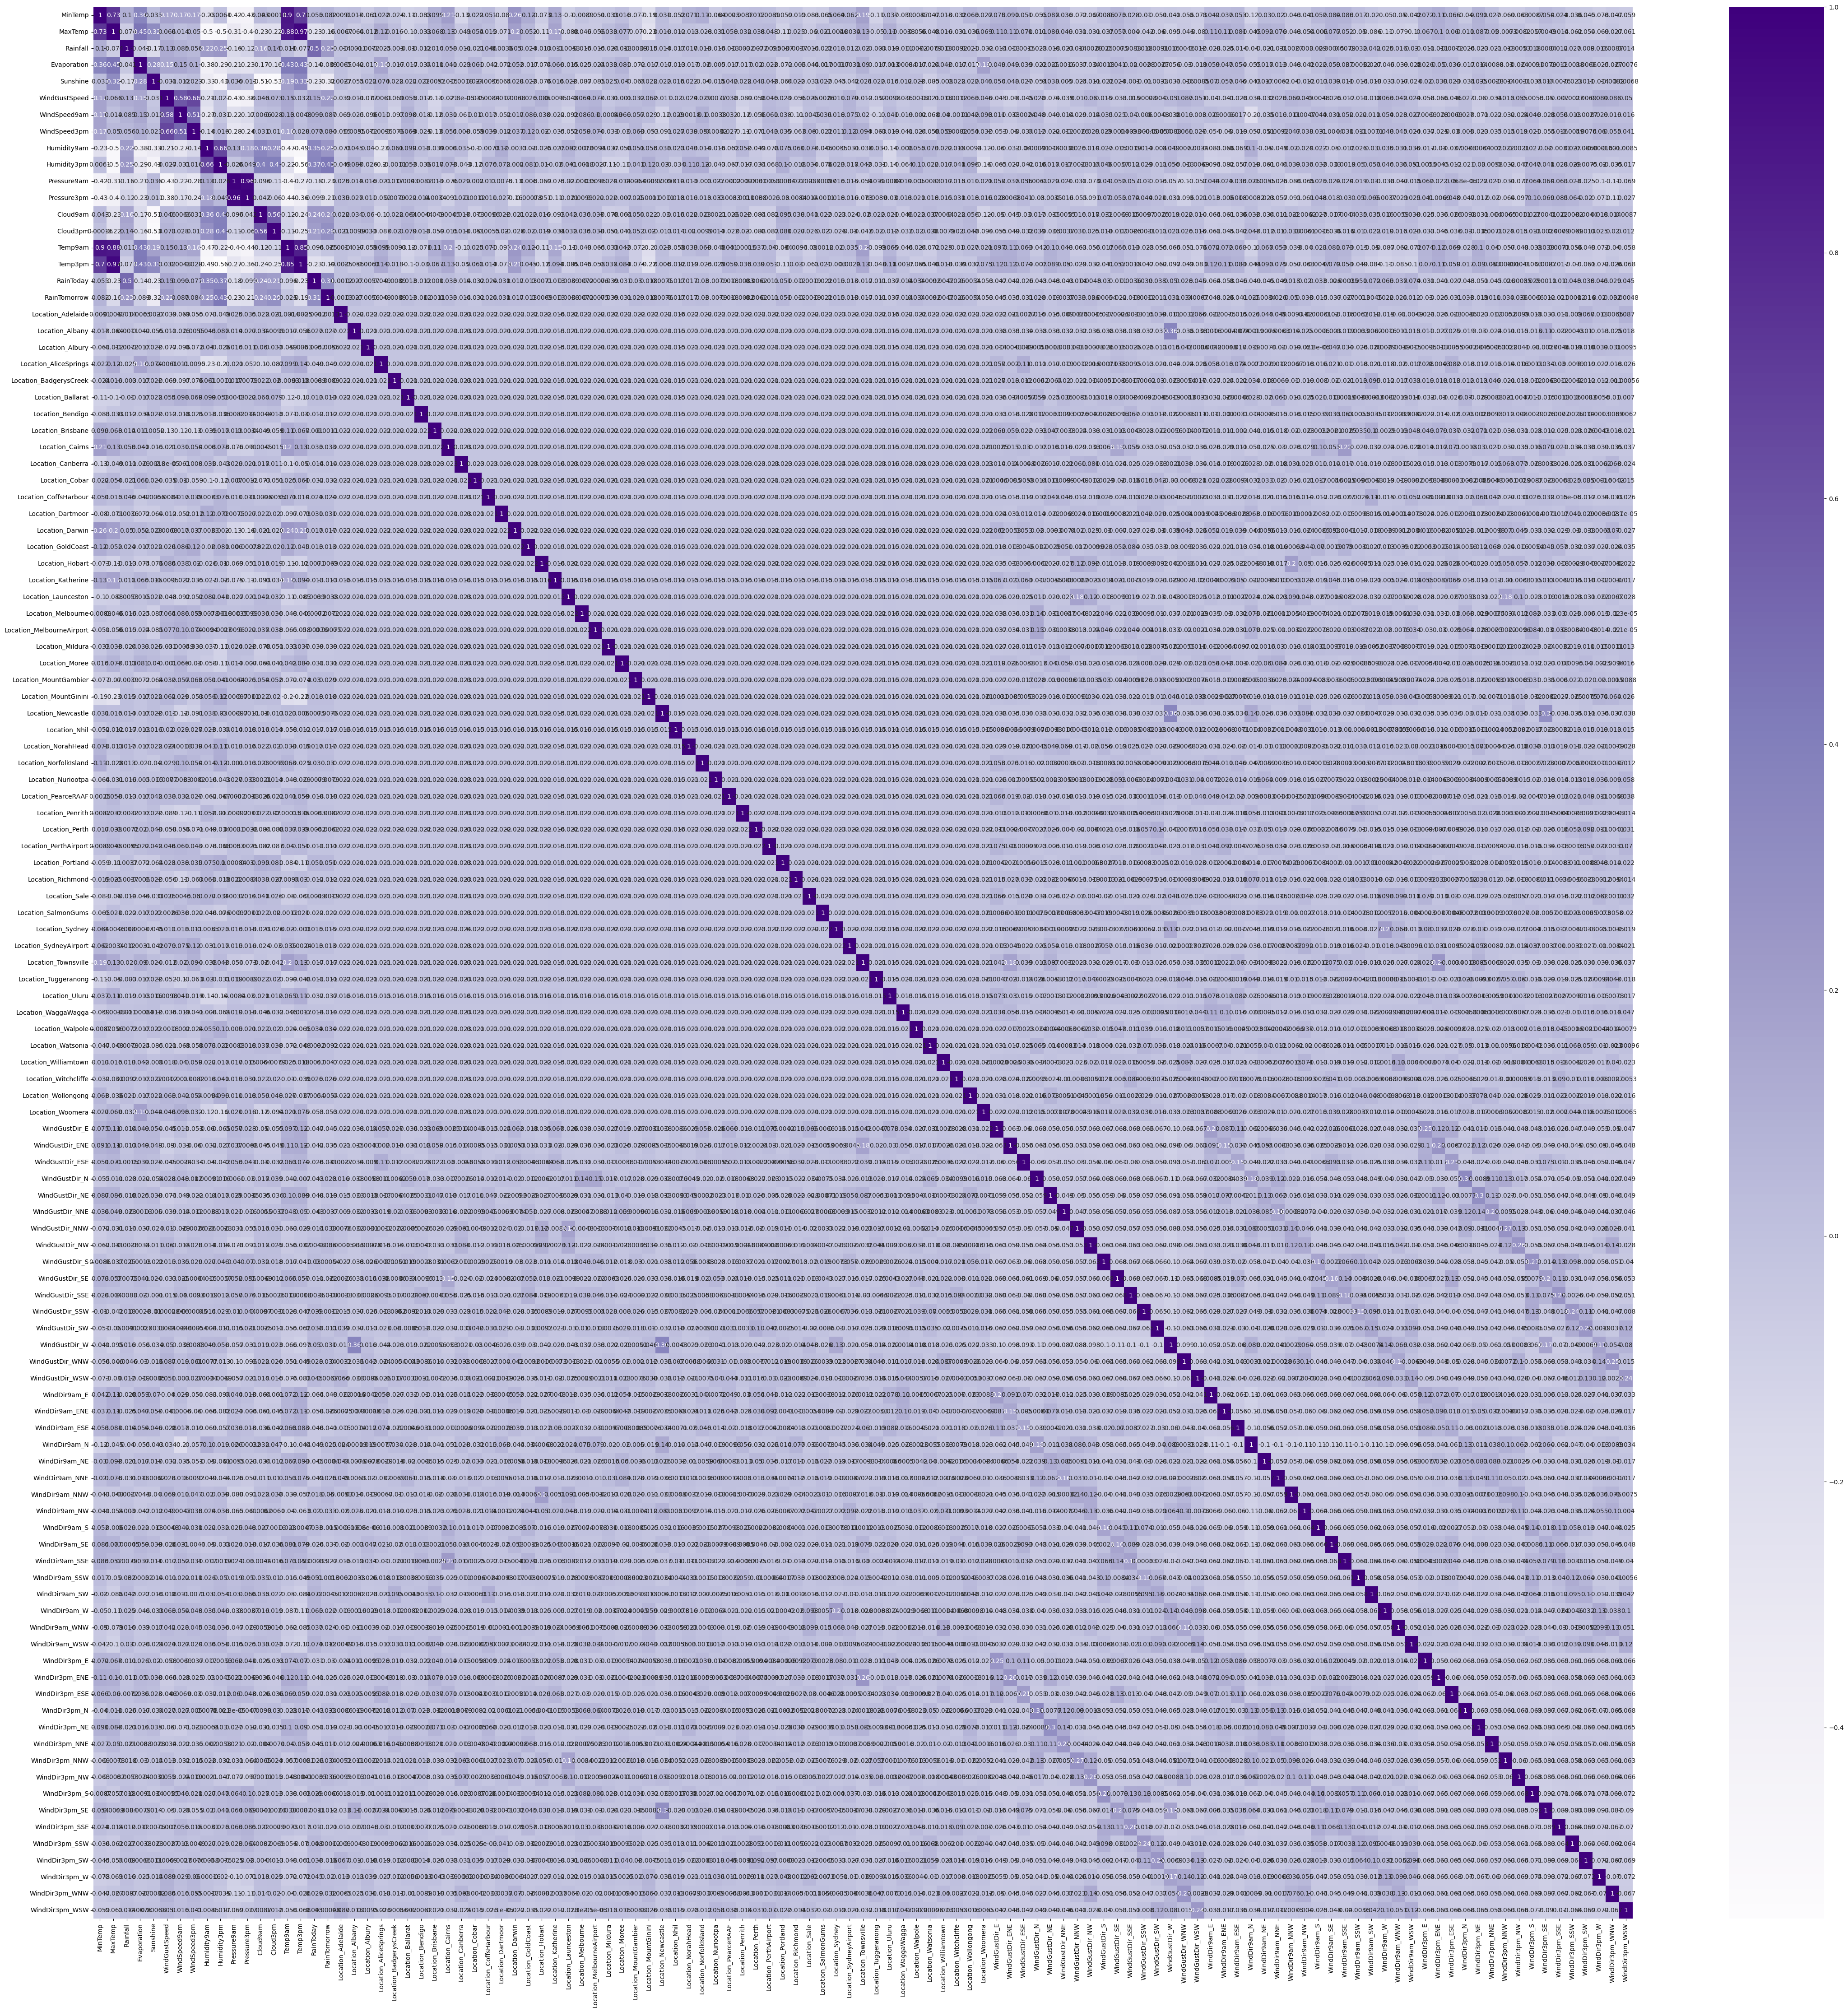

In [ ]:
# correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df_dummies.corr()
f, ax = plt.subplots(figsize=(55,55))
sns.heatmap(corrmat, annot=True, cmap='Purples')

## 5.Model Building

In [ ]:
# Extracting NumPy arrays X and y
X= df_dummies.drop(["RainTomorrow"],axis =1)
y= df_dummies["RainTomorrow"]
X= X.values
print(X.shape)
print(X.dtype)
X

(145460, 114)
float64


array([[13.4, 22.9,  0.6, ...,  0. ,  1. ,  0. ],
       [ 7.4, 25.1,  0. , ...,  0. ,  0. ,  1. ],
       [12.9, 25.7,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 5.4, 26.9,  0. , ...,  0. ,  1. ,  0. ],
       [ 7.8, 27. ,  0. , ...,  0. ,  0. ,  0. ],
       [14.9, 22.6,  0. , ...,  0. ,  0. ,  0. ]])

In [ ]:
# Extracting NumPy arrays X and y
y= y.values
print(y.shape)
print(y.dtype)
y

(145460,)
int64


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#split the data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(n_estimators=10, random_state=5)
gbrt = GradientBoostingClassifier(random_state=10)
xgbr = XGBClassifier(random_state=48)

In [ ]:
br = XGBClassifier(random_state=48)
# Preprocessing by scaling Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **KNN Model**

Model KNN:

1. Accuracy: 0.81
2. Precision: 0.71
3. Recall: 0.24
4. f1-measure: 0.36
5. Average Precision: 0.516


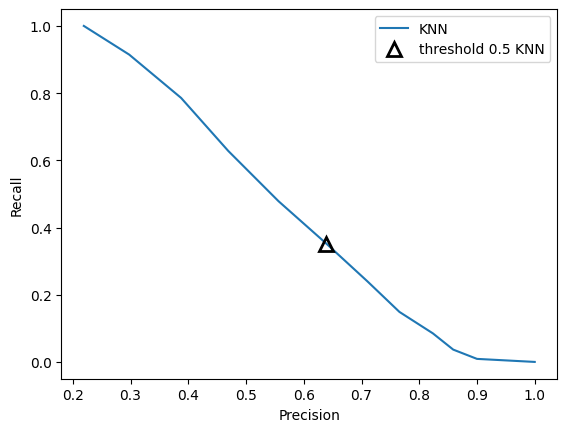

In [ ]:
# Building a KNN model on scaled training data
knn.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
knn.score(X_test_scaled, y_test)
acc_Knn = knn.score(X_test_scaled, y_test)
# Model prediction on test data
pred_Knn = knn.predict(X_test_scaled)
# For Binary Classification, the most commonly used metrics are:
# 1.Accuracy,
# 2.Precision,
# 3.Recall,
# 4.F1-measure,
# 5.Average Precision,
# 6.Area Under Curve AUC (ROC AUC),
# 7.Confusion Matrix,
# 8.Classification Report
print("Model KNN:\n")
print("1. Accuracy: {:.2f}".format(acc_Knn))

precision_Knn = precision_score(y_test, pred_Knn)
print("2. Precision: {:.2f}".format(precision_Knn))

recall_Knn = recall_score(y_test, pred_Knn)
print("3. Recall: {:.2f}".format(recall_Knn))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_Knn)))

predict_proba_Knn = knn.predict_proba(X_test_scaled)[:, 1]
precision_Knn, recall_Knn, thresholds_Knn = precision_recall_curve(y_test, predict_proba_Knn)
# find the threshold closest to zero
plt.plot(precision_Knn, recall_Knn, label="KNN")
close_default_Knn = np.argmin(np.abs(thresholds_Knn - 0.5))
plt.plot(precision_Knn[close_default_Knn], recall_Knn[close_default_Knn], '^', c='k', markersize=10, label="threshold 0.5 KNN", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_Knn = average_precision_score(y_test, predict_proba_Knn)
print("5. Average Precision: {:.3f}".format(ap_Knn))

6. ROC AUC: 0.786
7. Confusion matrix:
[[27621   777]
 [ 6060  1907]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.82      0.97      0.89     28398
   RainTomorrow       0.71      0.24      0.36      7967

       accuracy                           0.81     36365
      macro avg       0.77      0.61      0.62     36365
   weighted avg       0.80      0.81      0.77     36365



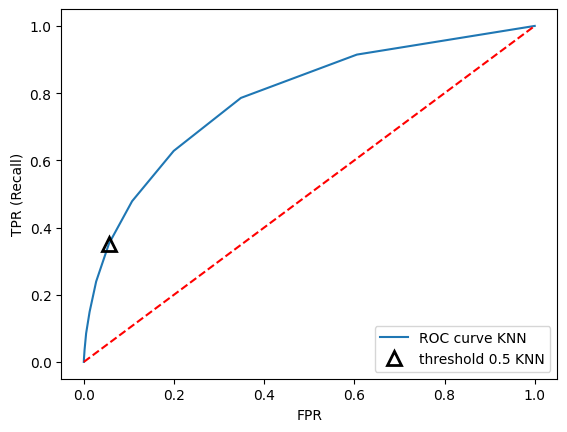

In [ ]:
fpr_Knn, tpr_Knn, thresholds_Knn = roc_curve(y_test, predict_proba_Knn)
plt.plot(fpr_Knn, tpr_Knn, label="ROC curve KNN")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_Knn = np.argmin(np.abs(thresholds_Knn - 0.5))
plt.plot(fpr_Knn[close_default_Knn], tpr_Knn[close_default_Knn], '^', markersize=10, label="threshold 0.5 KNN", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_Knn = roc_auc_score(y_test, predict_proba_Knn)
print("6. ROC AUC: {:.3f}".format(roc_auc_Knn))

confusion = confusion_matrix(y_test, pred_Knn)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_Knn, target_names=["No RainTomorrow", "RainTomorrow"]))

### **Decision Tree Model**

Model DecisionTree:

1. Accuracy: 0.79
2. Precision: 0.51
3. Recall: 0.52
4. f1-measure: 0.52
5. Average Precision: 0.371


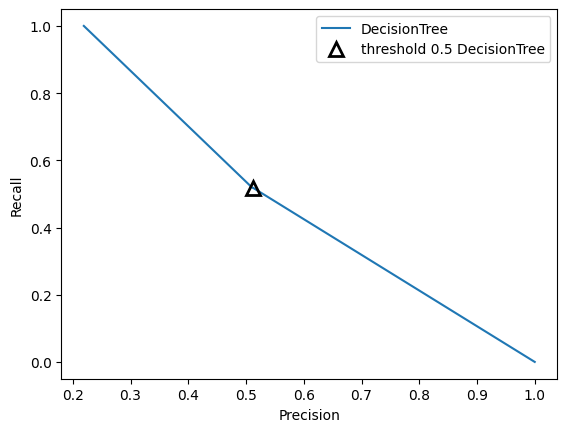

In [ ]:
# Building a DecisionTree model on scaled training data
tree.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
tree.score(X_test_scaled, y_test)
acc_tree = tree.score(X_test_scaled, y_test)
# Model prediction on test data
pred_tree = tree.predict(X_test_scaled)

print("Model DecisionTree:\n")
print("1. Accuracy: {:.2f}".format(acc_tree))

precision_tree = precision_score(y_test, pred_tree)
print("2. Precision: {:.2f}".format(precision_tree))

recall_tree = recall_score(y_test, pred_tree)
print("3. Recall: {:.2f}".format(recall_tree))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_tree)))

predict_proba_tree = tree.predict_proba(X_test_scaled)[:, 1]
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, predict_proba_tree)

# find the threshold closest to zero
plt.plot(precision_tree, recall_tree, label="DecisionTree")
close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], '^', c='k', markersize=10, label="threshold 0.5 DecisionTree", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_tree = average_precision_score(y_test, predict_proba_tree)
print("5. Average Precision: {:.3f}".format(ap_tree))

6. ROC AUC: 0.690
7. Confusion matrix:
[[24466  3932]
 [ 3839  4128]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.86      0.86      0.86     28398
   RainTomorrow       0.51      0.52      0.52      7967

       accuracy                           0.79     36365
      macro avg       0.69      0.69      0.69     36365
   weighted avg       0.79      0.79      0.79     36365



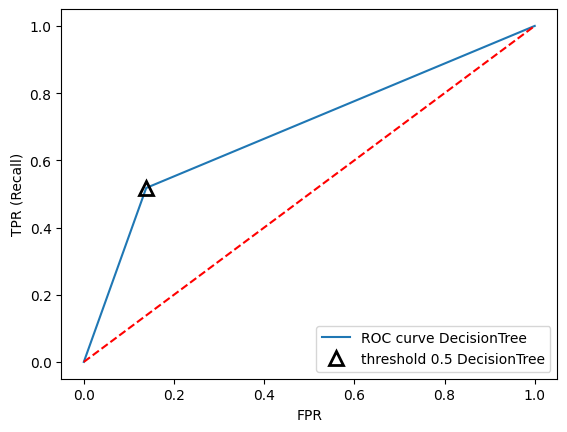

In [ ]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, predict_proba_tree)
plt.plot(fpr_tree, tpr_tree, label="ROC curve DecisionTree")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))
plt.plot(fpr_tree[close_default_tree], tpr_tree[close_default_tree], '^', markersize=10, label="threshold 0.5 DecisionTree", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_tree = roc_auc_score(y_test, predict_proba_tree)
print("6. ROC AUC: {:.3f}".format(roc_auc_tree))

confusion = confusion_matrix(y_test, pred_tree)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_tree, target_names=["No RainTomorrow", "RainTomorrow"]))

### **Random Forest Model**

Model RandomForest:

1. Accuracy: 0.84
2. Precision: 0.72
3. Recall: 0.42
4. f1-measure: 0.53
5. Average Precision: 0.615


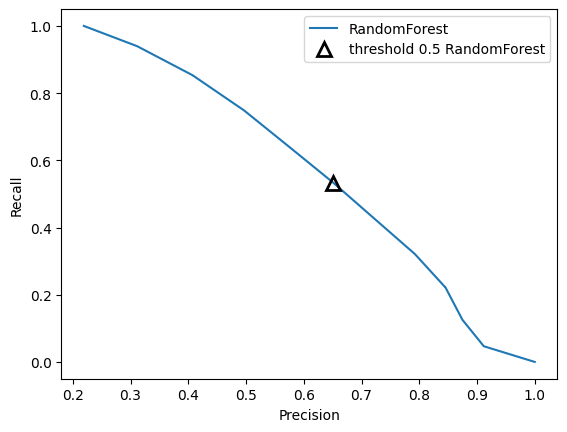

In [ ]:
# Building a RandomForest model on scaled training data
rf.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
rf.score(X_test_scaled, y_test)
acc_rf = rf.score(X_test_scaled, y_test)
# Model prediction on test data
pred_rf = rf.predict(X_test_scaled)

print("Model RandomForest:\n")
print("1. Accuracy: {:.2f}".format(acc_rf))

precision_rf = precision_score(y_test, pred_rf)
print("2. Precision: {:.2f}".format(precision_rf))

recall_rf = recall_score(y_test, pred_rf)
print("3. Recall: {:.2f}".format(recall_rf))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_rf)))

predict_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, predict_proba_rf)
# find the threshold closest to zero
plt.plot(precision_rf, recall_rf, label="RandomForest")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="threshold 0.5 RandomForest", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_rf = average_precision_score(y_test, predict_proba_rf)
print("5. Average Precision: {:.3f}".format(ap_rf))

6. ROC AUC: 0.839
7. Confusion matrix:
[[27115  1283]
 [ 4595  3372]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.86      0.95      0.90     28398
   RainTomorrow       0.72      0.42      0.53      7967

       accuracy                           0.84     36365
      macro avg       0.79      0.69      0.72     36365
   weighted avg       0.83      0.84      0.82     36365



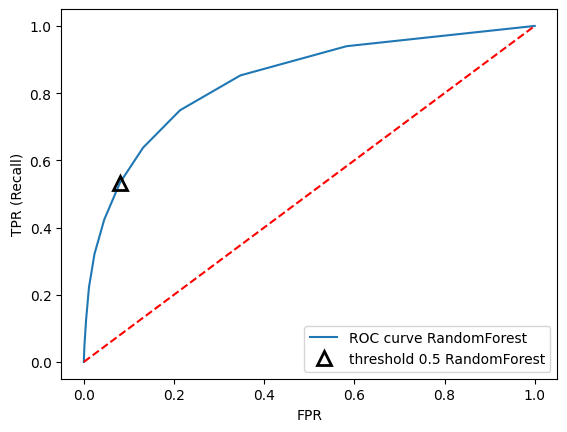

In [ ]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, predict_proba_rf)
plt.plot(fpr_rf, tpr_rf, label="ROC curve RandomForest")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="threshold 0.5 RandomForest", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_rf = roc_auc_score(y_test, predict_proba_rf)
print("6. ROC AUC: {:.3f}".format(roc_auc_rf))

confusion = confusion_matrix(y_test, pred_rf)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_rf, target_names=["No RainTomorrow", "RainTomorrow"]))

### **Gradient Boosting Model**

Model GradientBoosting:

1. Accuracy: 0.85
2. Precision: 0.74
3. Recall: 0.48
4. f1-measure: 0.58
5. Average Precision: 0.690


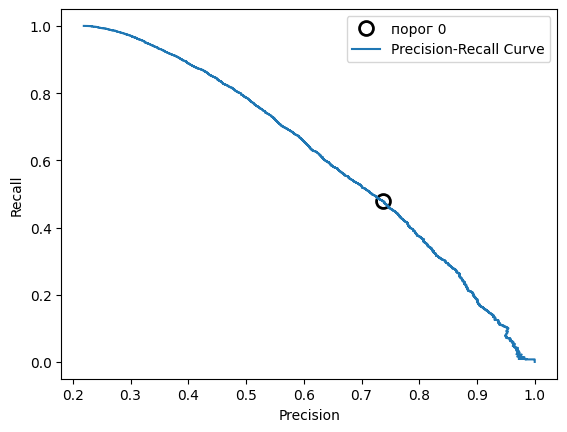

In [ ]:
# Building a GradientBoosting model on scaled training data
gbrt.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
gbrt.score(X_test_scaled, y_test)
acc_gbrt = gbrt.score(X_test_scaled, y_test)
# Model prediction on test data
pred_gbrt = gbrt.predict(X_test_scaled)

print("Model GradientBoosting:\n")
print("1. Accuracy: {:.2f}".format(acc_gbrt))

precision_gbrt = precision_score(y_test, pred_gbrt)
print("2. Precision: {:.2f}".format(precision_gbrt))

recall_gbrt = recall_score(y_test, pred_gbrt)
print("3. Recall: {:.2f}".format(recall_gbrt))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_gbrt)))

decision_function_gbrt = gbrt.decision_function(X_test_scaled)
precision_gbrt, recall_gbrt, thresholds_gbrt = precision_recall_curve(y_test, decision_function_gbrt)

# find the threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_gbrt))
plt.plot(precision_gbrt[close_zero], recall_gbrt[close_zero], 'o', markersize=10, label="порог 0", fillstyle="none", c='k', mew=2)
plt.plot(precision_gbrt, recall_gbrt, label="Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


ap_gbrt = average_precision_score(y_test, decision_function_gbrt)
print("5. Average Precision: {:.3f}".format(ap_gbrt))

6. ROC AUC: 0.865
7. Confusion matrix:
[[27038  1360]
 [ 4155  3812]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.87      0.95      0.91     28398
   RainTomorrow       0.74      0.48      0.58      7967

       accuracy                           0.85     36365
      macro avg       0.80      0.72      0.74     36365
   weighted avg       0.84      0.85      0.84     36365



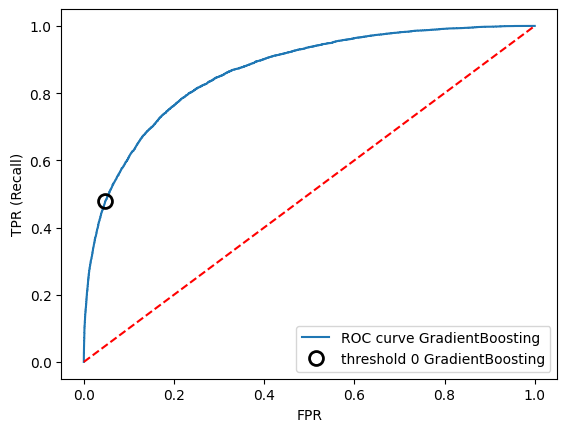

In [ ]:
fpr_gbrt, tpr_gbrt, thresholds_gbrt = roc_curve(y_test, decision_function_gbrt)
plt.plot(fpr_gbrt, tpr_gbrt, label="ROC curve GradientBoosting")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_zero = np.argmin(np.abs(thresholds_gbrt))
plt.plot(fpr_gbrt[close_zero], tpr_gbrt[close_zero], 'o', markersize=10, label="threshold 0 GradientBoosting", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_gbrt = roc_auc_score(y_test, decision_function_gbrt)
print("6. ROC AUC: {:.3f}".format(roc_auc_gbrt))

confusion = confusion_matrix(y_test, pred_gbrt)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_gbrt, target_names=["No RainTomorrow", "RainTomorrow"]))

### **XGB Model**

Model XGB:

1. Accuracy: 0.86
2. Precision: 0.73
3. Recall: 0.54
4. f1-measure: 0.62
5. Average Precision: 0.726


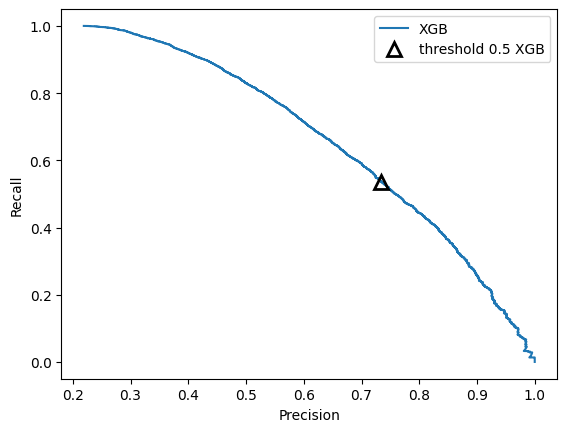

In [ ]:
# Building a XGB model on scaled training data
xgbr.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
xgbr.score(X_test_scaled, y_test)
acc_xgbr = xgbr.score(X_test_scaled, y_test)
# Model prediction on test data
pred_xgbr = xgbr.predict(X_test_scaled)

print("Model XGB:\n")
print("1. Accuracy: {:.2f}".format(acc_xgbr))

precision_xgbr = precision_score(y_test, pred_xgbr)
print("2. Precision: {:.2f}".format(precision_xgbr))

recall_xgbr = recall_score(y_test, pred_xgbr)
print("3. Recall: {:.2f}".format(recall_xgbr))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_xgbr)))

predict_proba_xgbr = xgbr.predict_proba(X_test_scaled)[:, 1]
precision_xgbr, recall_xgbr, thresholds_xgbr = precision_recall_curve(y_test, predict_proba_xgbr)
# find the threshold closest to zero
plt.plot(precision_xgbr, recall_xgbr, label="XGB")
close_default_xgbr = np.argmin(np.abs(thresholds_xgbr - 0.5))
plt.plot(precision_xgbr[close_default_xgbr], recall_xgbr[close_default_xgbr], '^', c='k', markersize=10, label="threshold 0.5 XGB", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_xgbr = average_precision_score(y_test, predict_proba_xgbr)
print("5. Average Precision: {:.3f}".format(ap_xgbr))

6. ROC AUC: 0.885
7. Confusion matrix:
[[26855  1543]
 [ 3695  4272]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.88      0.95      0.91     28398
   RainTomorrow       0.73      0.54      0.62      7967

       accuracy                           0.86     36365
      macro avg       0.81      0.74      0.77     36365
   weighted avg       0.85      0.86      0.85     36365



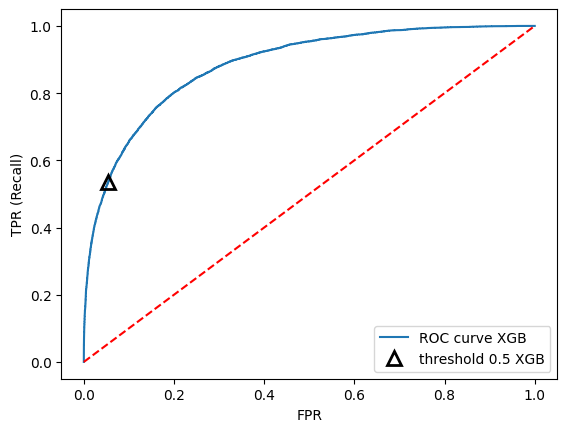

In [ ]:
fpr_xgbr, tpr_xgbr, thresholds_xgbr = roc_curve(y_test, predict_proba_xgbr)
plt.plot(fpr_xgbr, tpr_xgbr, label="ROC curve XGB")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_xgbr = np.argmin(np.abs(thresholds_xgbr - 0.5))
plt.plot(fpr_xgbr[close_default_xgbr], tpr_xgbr[close_default_xgbr], '^', markersize=10, label="threshold 0.5 XGB", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_xgbr = roc_auc_score(y_test, predict_proba_xgbr)
print("6. ROC AUC: {:.3f}".format(roc_auc_xgbr))

confusion = confusion_matrix(y_test, pred_xgbr)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_xgbr, target_names=["No RainTomorrow", "RainTomorrow"]))

## 6.Model Evaluation

In [ ]:
models_acc = pd.DataFrame({
    'Model': ['KNeighbors', 'DecisionTree', 'RandomForest',
              'GradientBoosting', 'XGB'],
    'Accuracy': [acc_Knn, acc_tree, acc_rf, acc_gbrt, acc_xgbr]})
models_acc.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
4               XGB  0.855960
3  GradientBoosting  0.848343
2      RandomForest  0.838361
0        KNeighbors  0.811990
1      DecisionTree  0.786306

In [ ]:
models_ROC_AUC = pd.DataFrame({
    'Model': ['KNeighbors', 'DecisionTree', 'RandomForest',
              'GradientBoosting', 'XGB'],
    'ROC_AUC': [roc_auc_Knn, roc_auc_tree, roc_auc_rf, roc_auc_gbrt, roc_auc_xgbr]})
models_ROC_AUC.sort_values(by='ROC_AUC', ascending=False)

Model   ROC_AUC
4               XGB  0.884564
3  GradientBoosting  0.865384
2      RandomForest  0.839315
0        KNeighbors  0.786339
1      DecisionTree  0.689723